In [4]:
import numpy as np
import pandas as pd
import os
import time
import glob
import matplotlib
from PIL import Image

In [38]:
PARENT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
DATASET = os.path.join(PARENT_DIR, "cow_dataset.csv")
# DATA_DIR = os.path.join(PARENT_DIR, "data")
IMAGES_DIR = os.path.join(PARENT_DIR, "data-2023", "images")
# YT_IMAGES_DIR = os.path.join(PARENT_DIR, "data", "yt_images")
images = glob.glob(f"{IMAGES_DIR}/*/*.jpg")
# yt_images = glob.glob(f"{YT_IMAGES_DIR}/*/*.jpg")

In [11]:
df = pd.read_csv(DATASET)

In [12]:
df.head(4)

id      sku type        sex    color  \
0  1d9ff108-60dc-4f9e-98b4-e85ced1c6a67  BLF2340  COW  MALE_BULL      RED   
1  685f6e3e-2ed6-46ec-9b3c-4c52a7913ed4  BLF2342  COW  MALE_BULL  NON_RED   
2  092a2994-3f53-410c-a7a1-b6bfe2d94278  BLF2001  COW  MALE_BULL      RED   
3  7f52cc19-e188-4c61-9138-564d5a5e0c4a  BLF2002  COW  MALE_BULL  NON_RED   

   breed                                               feed age_in_month  \
0  LOCAL  ['JUMBOO', 'LUCERNE', 'NAPIER', 'SILAGE', 'STR...      2 Years   
1  LOCAL  ['JUMBOO', 'LUCERNE', 'NAPIER', 'SILAGE', 'STR...      2 Years   
2  LOCAL  ['JUMBOO', 'LUCERNE', 'NAPIER', 'SILAGE', 'STR...      2 Years   
3  LOCAL  ['JUMBOO', 'LUCERNE', 'NAPIER', 'SILAGE', 'STR...    2.5 Years   

                                              slides  sale_offer_percentage  \
0  [{'id': '640e1e9e-3f5e-4792-93d2-6a5f53594698'...                    0.0   
1  [{'id': '4cc01c8c-0fa9-412b-89b4-de611f612b38'...                    0.0   
2  [{'id': '061cbab5-d3b7-41e9-99d6-a79a93b30c3d'...                    0.0   
3  [{'id': '16fb855b-e473-43bc-9cc1-80418eeb1e75'...                    0.0   

   ... is_dewormed  is_fmd_vaccinated  is_anthrax_vaccinated  \
0  ...        True               True                   True   
1  ...        True               True                   True   
2  ...        True               True                   True   
3  ...        True               True                   True   

   is_lumpy_skin_disease    size  \
0                   True  MEDIUM   
1                   True   LARGE   
2                   True  MEDIUM   
3                   True   LARGE   

                                           thumbnail  \
0  https://uploads-prod.aws.bengalmeat.com/media/...   
1  https://uploads-prod.aws.bengalmeat.com/media/...   
2  https://uploads-prod.aws.bengalmeat.com/media/...   
3  https://uploads-prod.aws.bengalmeat.com/media/...   

                         created_at          status  images_count  \
0  2021-07-17T20:02:29.885357+06:00  SHARED_ORDERED             4   
1  2021-07-17T20:13:06.519925+06:00          SHARED             4   
2  2021-06-13T17:54:31.956137+06:00         ORDERED             4   
3  2021-06-13T17:58:34.983272+06:00       AVAILABLE             4   

   yt_videos_count  
0                0  
1                1  
2                1  
3                1  

[4 rows x 28 columns]

In [16]:
df.iloc[0,:]

id                                    1d9ff108-60dc-4f9e-98b4-e85ced1c6a67
sku                                                                BLF2340
type                                                                   COW
sex                                                              MALE_BULL
color                                                                  RED
breed                                                                LOCAL
feed                     ['JUMBOO', 'LUCERNE', 'NAPIER', 'SILAGE', 'STR...
age_in_month                                                       2 Years
slides                   [{'id': '640e1e9e-3f5e-4792-93d2-6a5f53594698'...
sale_offer_percentage                                                  0.0
feedlot_in_month                                                  3 Months
teeth                                                                    2
parts_available                                                          0
height_in_inch           

In [13]:
df.shape

(1542, 28)

In [15]:
print(f"total images_count: {df.images_count.sum()}")
print(f"total yt_videos_count: {df.yt_videos_count.sum()}")
# print(f"total images: {df.total_images.sum()}")

total images_count: 6168
total yt_videos_count: 1511


['MALE_BULL', 'FEMALE_HEIFER', 'MALE_STEER']
3


<Axes: >

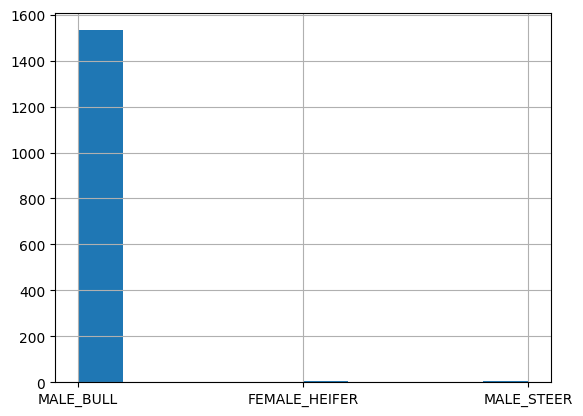

In [17]:
unique_sex = list(df.sex.unique()) # Input
print(unique_sex)
print(len(unique_sex))
df.sex.hist()

['RED', 'NON_RED', 'CROSS_RED']
3


<Axes: >

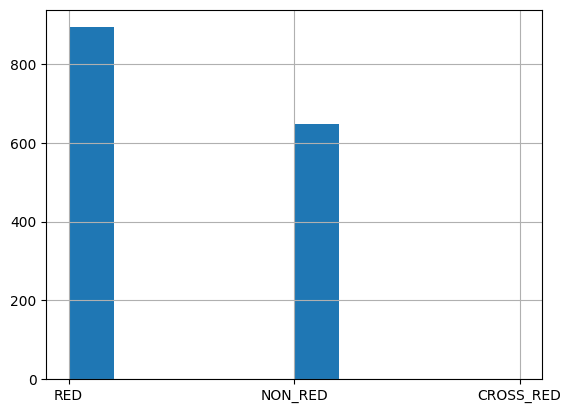

In [18]:
unique_color = list(df.color.unique())
print(unique_color)
print(len(unique_color))
df.color.hist()

[2, 4, 6, 3, 8]
5


<Axes: >

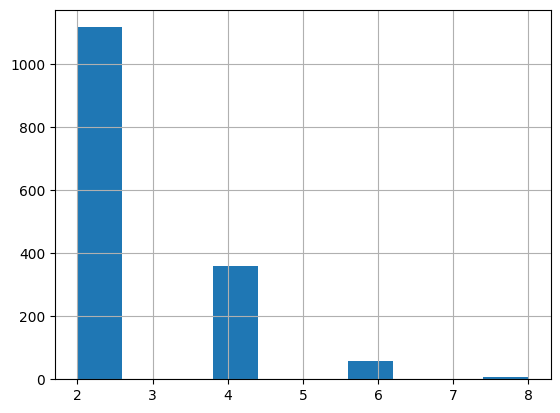

In [23]:
unique_teeth = list(df.teeth.unique()) # Input
print(unique_teeth)
print(len(unique_teeth))
df.teeth.hist()

['LOCAL', 'SAHIWAL', 'RED_CHITTAGONG', 'SINDHI', 'PABNA_BREED', 'HOSTINE_CROSS', 'BRAHMA', 'MIR_KADIM']
8


<Axes: >

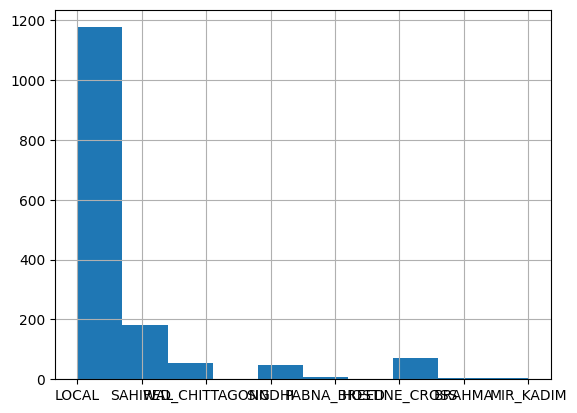

In [19]:
unique_breed = list(df.breed.unique()) # Output
print(unique_breed)
print(len(unique_breed))
df.breed.hist()

['2 Years', '2.5 Years', '3 Years']
3


<Axes: >

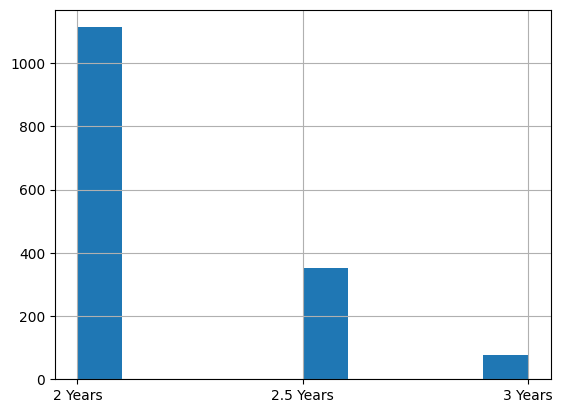

In [22]:
unique_age_in_month = list(df.age_in_month.unique()) # Output
print(unique_age_in_month)
print(len(unique_age_in_month))
df.age_in_month.hist()

['3 Months', '3 Years', '24 Months', '12 Months', '6 Months', '4 Months', '9 Months']
7


<Axes: >

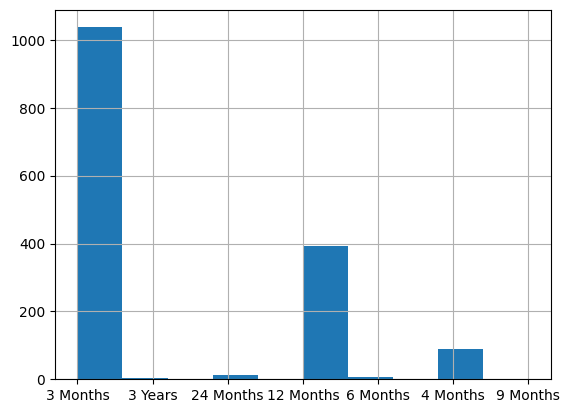

In [24]:
unique_feedlot_in_month = list(df.feedlot_in_month.unique()) # Output
print(unique_feedlot_in_month)
print(len(unique_feedlot_in_month))
df.feedlot_in_month.hist()

[50.9, 52.0, 48.5, 51.0, 44.0, 43.5, 45.0, 48.0, 46.0, 43.2, 47.0, 45.8, 42.0, 44.6, 45.2, 49.0, 46.6, 44.5, 48.7, 47.2, 50.0, 41.0, 45.6, 47.1, 44.3, 43.7, 53.6, 47.5, 50.3, 46.8, 42.9, 46.9, 48.3, 42.6, 43.0, 48.4, 47.3, 45.5, 49.2, 49.8, 49.3, 43.1, 42.4, 49.4, 55.5, 49.6, 45.7, 48.1, 44.8, 45.4, 51.6, 42.2, 40.6, 47.7, 41.5, 44.4, 46.5, 46.3, 47.8, 44.9, 52.8, 51.5, 50.7, 55.0, 50.4, 43.4, 50.5, 45.3, 49.5, 46.2, 47.6, 45.9, 44.2, 41.6, 39.0, 41.4, 45.1, 47.9, 41.2, 42.3, 43.6, 40.0, 57.6, 52.1, 50.8, 51.9, 54.0, 54.9, 57.0, 53.0, 56.4, 50.2, 51.1, 52.5, 56.1, 56.8, 52.3, 42.8, 43.3, 52.4, 44.7, 39.1, 38.0, 38.8, 42.5, 58.2, 51.2, 43.8, 38.1, 40.7, 36.4, 41.3, 46.4, 40.3, 41.1, 38.5, 39.3, 38.3, 38.4, 36.5, 39.2, 37.8, 37.0, 34.9, 36.0, 38.2, 41.11, 40.2, 39.6, 45.11, 40.8, 39.5, 38.9, 33.6, 37.2, 38.6, 40.1, 39.4, 39.8, 42.1, 44.1, 41.8, 37.1, 35.5, 40.9, 40.4, 34.4, 61.8, 43.11, 36.8, 60.0, 39.9, 42.7, 46.1, 40.5, 44.11, 43.9, 41.7, 58.0, 41.9, 38.11, 61.0, 39.11, 35.9, 51.8, 39.

<Axes: >

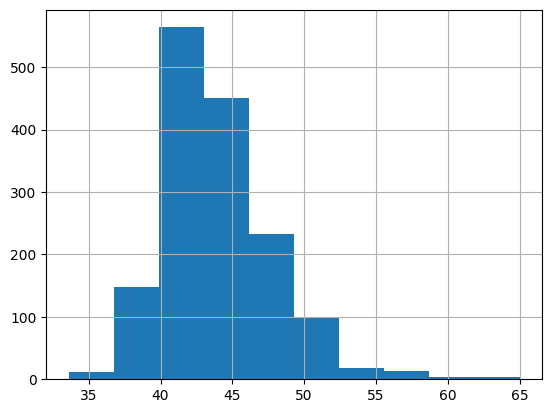

In [25]:
unique_height_in_inch = list(df.height_in_inch.unique()) # Output
print(unique_height_in_inch)
print(len(unique_height_in_inch))
df.height_in_inch.hist()

[270.0, 256.0, 279.0, 296.0, 212.0, 202.0, 205.0, 258.0, 240.0, 215.0, 226.0, 224.0, 245.0, 255.0, 185.0, 200.0, 210.0, 250.0, 211.0, 225.0, 230.0, 265.0, 160.0, 242.0, 235.0, 220.0, 345.0, 282.0, 246.0, 315.0, 285.0, 300.0, 275.0, 216.0, 302.0, 273.0, 218.0, 213.0, 288.0, 267.0, 286.0, 305.0, 227.0, 236.0, 281.0, 272.0, 262.0, 239.0, 280.0, 217.0, 195.0, 223.0, 287.0, 271.0, 263.0, 252.0, 222.0, 221.0, 0.0, 257.0, 295.0, 208.0, 238.0, 179.0, 181.0, 259.0, 277.0, 291.0, 247.0, 283.0, 260.0, 201.0, 234.0, 244.0, 170.0, 249.0, 289.0, 266.0, 199.0, 219.0, 172.0, 204.0, 268.0, 180.0, 232.0, 229.0, 203.0, 241.0, 254.0, 261.0, 269.0, 196.0, 248.0, 209.0, 299.0, 311.0, 189.0, 194.0, 207.0, 214.0, 197.0, 251.0, 228.0, 206.0, 231.0, 183.0, 164.0, 176.0, 174.0, 186.0, 162.0, 154.0, 237.0, 173.0, 264.0, 191.0, 182.0, 161.0, 178.0, 198.0, 150.0, 155.0, 816.0, 606.0, 383.0, 375.0, 430.0, 340.0, 322.0, 243.0, 457.0, 415.0, 278.0, 438.0, 355.0, 330.0, 545.0, 378.0, 407.0, 487.0, 297.0, 276.0, 546.0, 

<Axes: >

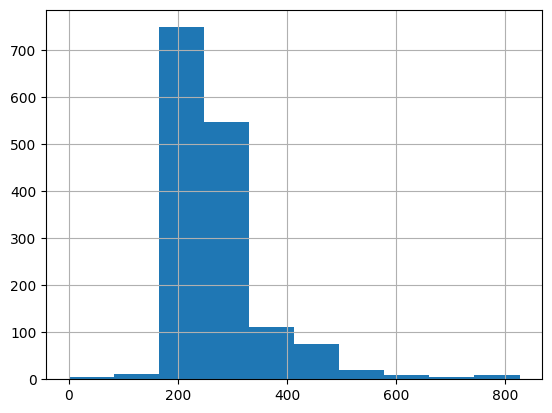

In [26]:
unique_weight_in_kg = list(df.weight_in_kg.unique()) # Output
print(unique_weight_in_kg)
print(len(unique_weight_in_kg))
df.weight_in_kg.hist()

[19000.0, 18000.0, 120000.0, 125000.0, 92000.0, 88000.0, 112000.0, 102000.0, 95000.0, 96000.0, 105000.0, 104000.0, 108000.0, 79000.0, 85000.0, 91000.0, 97000.0, 98000.0, 89000.0, 111000.0, 90000.0, 106000.0, 71000.0, 99000.0, 87000.0, 100000.0, 86000.0, 93000.0, 146000.0, 122000.0, 109000.0, 136000.0, 123000.0, 129000.0, 119000.0, 94000.0, 131000.0, 117000.0, 115000.0, 127000.0, 80000.0, 107000.0, 121000.0, 130000.0, 103000.0, 118000.0, 84000.0, 116000.0, 20000.0, 114000.0, 81000.0, 128000.0, 101000.0, 78000.0, 110000.0, 133000.0, 126000.0, 75000.0, 76000.0, 113000.0, 134000.0, 83000.0, 74000.0, 82000.0, 73000.0, 72000.0, 70000.0, 77000.0, 124000.0, 107930.0, 66000.0, 60000.0, 16000.0, 335000.0, 265000.0, 162000.0, 161000.0, 180000.0, 143000.0, 135000.0, 138000.0, 197000.0, 179000.0, 185000.0, 24000.0, 142000.0, 230000.0, 163000.0, 172000.0, 208000.0, 203000.0, 26000.0, 158000.0, 210000.0, 174000.0, 171000.0, 182000.0, 30000.0, 25000.0, 209000.0, 173000.0, 184000.0, 189000.0, 175000.0,

<Axes: >

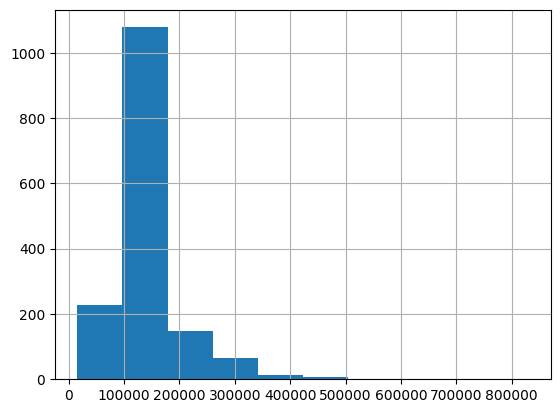

In [27]:
unique_price = list(df.price.unique()) # Output
print(unique_price)
print(len(unique_price))
df.price.hist()

['MEDIUM', 'LARGE', 'MINIMUM', 'EXTRA_LARGE', 'NA']
5


<Axes: >

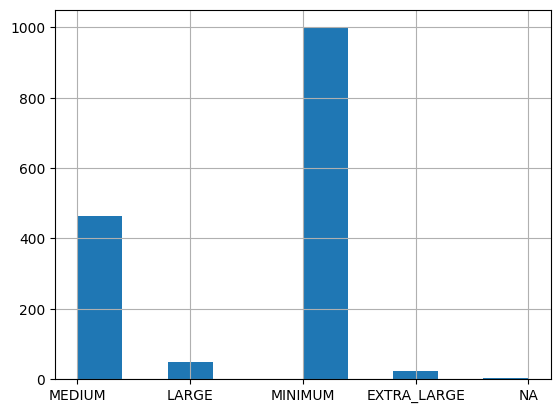

In [28]:
df.loc[:, "size"].fillna("NA", inplace=True)
unique_size = list(df.loc[:, "size"].unique()) # None
print(unique_size)
print(len(unique_size))
df.loc[:, "size"].hist()

<Axes: ylabel='breed'>

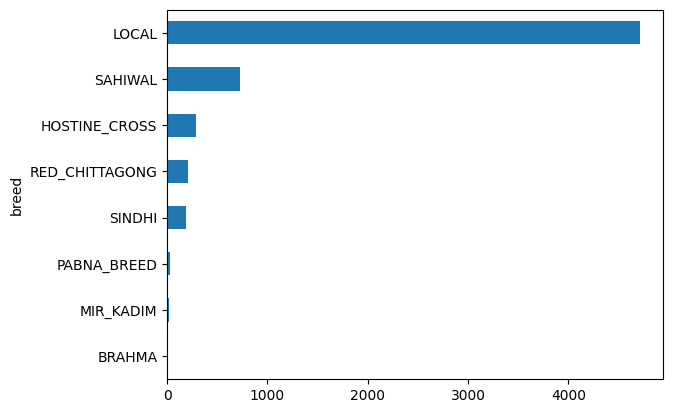

In [30]:
df.groupby("breed")["images_count"].sum().sort_values().plot(kind="barh")

<Axes: ylabel='breed'>

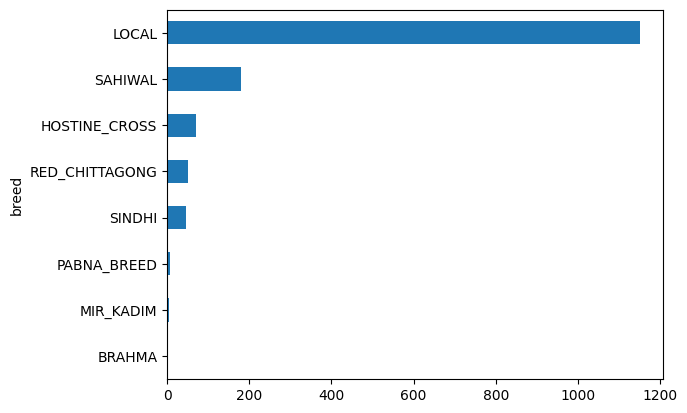

In [31]:
df.groupby("breed")["yt_videos_count"].sum().sort_values().plot(kind="barh")

In [32]:
df.breed.value_counts()

breed
LOCAL             1177
SAHIWAL            181
HOSTINE_CROSS       71
RED_CHITTAGONG      53
SINDHI              47
PABNA_BREED          6
MIR_KADIM            4
BRAHMA               3
Name: count, dtype: int64

In [34]:
df.height_in_inch.value_counts()

height_in_inch
43.0    71
42.0    62
41.0    60
44.0    60
47.0    43
        ..
35.5     1
34.4     1
61.8     1
36.8     1
49.9     1
Name: count, Length: 191, dtype: int64

In [35]:
df.weight_in_kg.value_counts()

weight_in_kg
220.0    22
236.0    22
246.0    22
210.0    22
230.0    21
         ..
373.0     1
449.0     1
175.0     1
314.0     1
479.0     1
Name: count, Length: 308, dtype: int64

In [36]:
interval_range = pd.interval_range(start=df.weight_in_kg.min(), freq=5, end=df.weight_in_kg.max())
weight = pd.cut(df['weight_in_kg'], bins=interval_range).value_counts().sort_values(ascending=False)

<Axes: ylabel='weight_in_kg'>

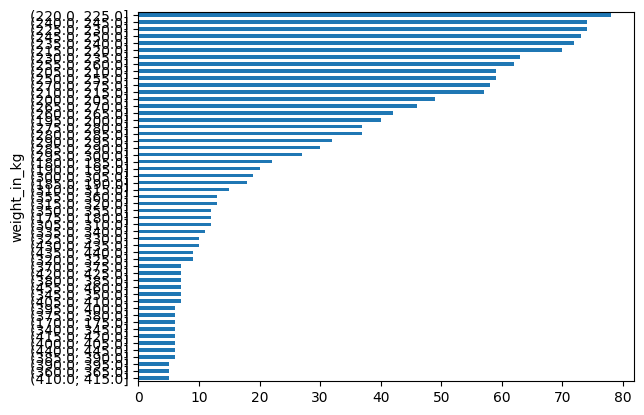

In [37]:
pd.Series(weight).where(lambda x : x > 4).dropna().sort_values(ascending=True).plot(kind="barh")

(675, 450)


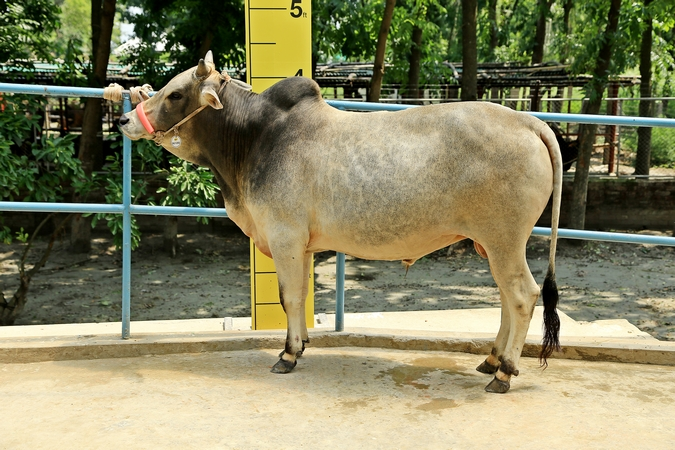

In [51]:
print(Image.open(images[0]).size)
Image.open(images[0])

(1012, 675)


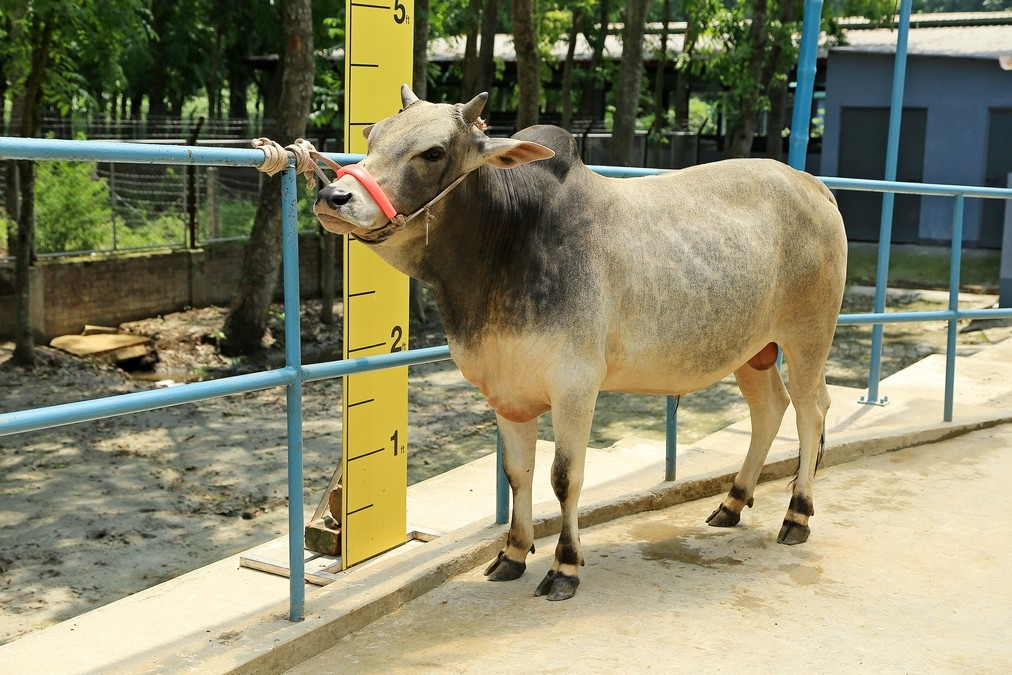

In [43]:

print(Image.open(images[1]).size)
Image.open(images[1])

(1012, 675)


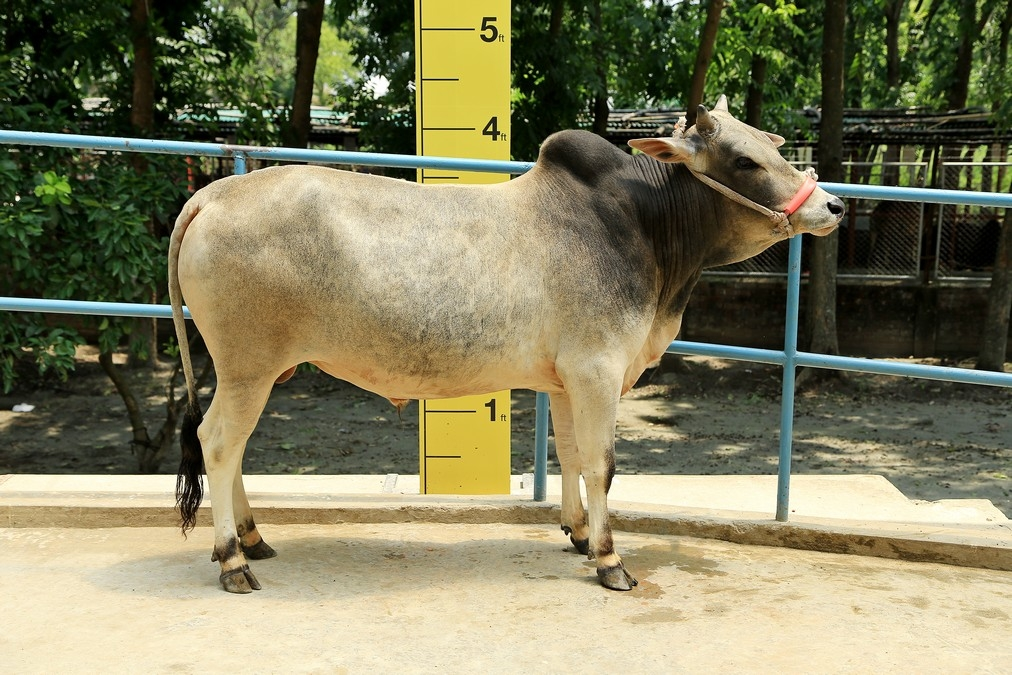

In [44]:
print(Image.open(images[2]).size)
Image.open(images[2])

(1012, 675)


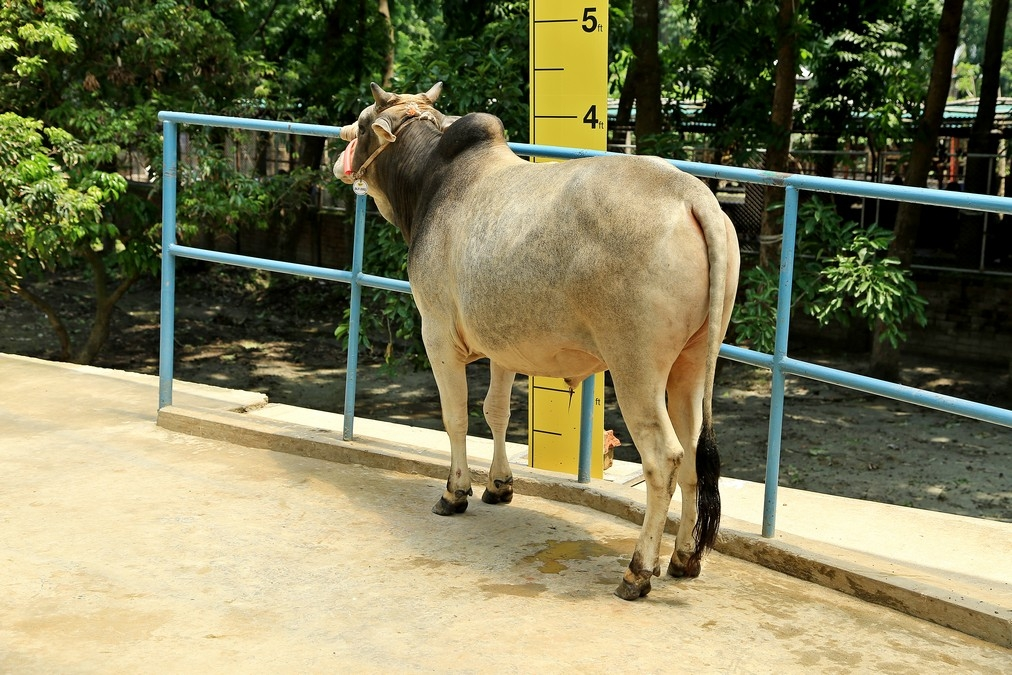

In [45]:
print(Image.open(images[3]).size)
Image.open(images[3])